# 1. Carga de bibliotetas

Seccion para instalar e importar bibliotecas necesarias

In [65]:
# Acá instalamos la biblioteca fitter para el ajuste de funciones
!pip install fitter

In [66]:
# Acá importarmos todas las bibliotecas necesarias: Pandas, Numpy, Scipy y Fitter
from fitter import Fitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [67]:
# Esto se hace para montar el gogle drive y poder acceder datos alojados allí.
# from google.colab import drive
# drive.mount('/content/drive')

# 2. Carga de datos

Utilizaremos los datos de recorrido de bicicletas públicas de la ciudad de Buenos Aires
https://data.buenosaires.gob.ar/dataset/bicicletas-publicas

Bajaremos el archivo "Recorridos Realizados 2023 (ZIP)", descomprimiremos el archivo csv presente ("trips_2023.csv")y lo alojamos dentro de la carpeta "Colab Notebooks" de nuestro Google Drive




In [68]:
# En esta parte del código se debe modificar la ubicación correcta del google drive
# bicis = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EPIO/Datos/trips_2023.csv')
productos = pd.read_csv('./Fecom_Inc_Products.csv', sep=';')

# 3. Análisis Exploratorio de Datos

In [69]:
# Corroboramos que el tipo de dato de la variable "bicis" es un dataframe
type(productos)

pandas.core.frame.DataFrame

In [70]:
# Primeras lineas de nuestro dataframe
productos.head()

,Product_ID,Product_Category_Name,Product_Weight_Gr,Product_Length_Cm,Product_Height_Cm,Product_Width_Cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,625.0,20.0,17.0,13.0


In [71]:
# Si solo quiero los nombres de las columnas en formato lista
productos.columns

Index(['Product_ID', 'Product_Category_Name', 'Product_Weight_Gr',
       'Product_Length_Cm', 'Product_Height_Cm', 'Product_Width_Cm'],
      dtype='object')

In [72]:
# Dimensionalidad del dataframe
productos.shape

(32951, 6)

In [73]:
# El tipo de dato de cada una de las columnas
# Acá veo que 'duracion_recorrido', 'fecha_origen_recorrido' y 'fecha_destino_recorrido'
# son de tipo object (texto) y no está bueno eso
productos.dtypes

Product_ID                object
Product_Category_Name     object
Product_Weight_Gr        float64
Product_Length_Cm        float64
Product_Height_Cm        float64
Product_Width_Cm         float64
dtype: object

In [74]:
# Para acceder a una columna específica puedo usar el operador punto:
productos.Product_Width_Cm

0        14.0
1        20.0
2        15.0
3        26.0
4        13.0
         ... 
32946    40.0
32947    16.0
32948    27.0
32949    20.0
32950     7.0
Name: Product_Width_Cm, Length: 32951, dtype: float64

In [75]:
# O el operador corchete:
productos['Product_Width_Cm']

0        14.0
1        20.0
2        15.0
3        26.0
4        13.0
         ... 
32946    40.0
32947    16.0
32948    27.0
32949    20.0
32950     7.0
Name: Product_Width_Cm, Length: 32951, dtype: float64

# 5. Cálculo de FDPS

/home/daniel/miniconda3/envs/simulacion/lib/python3.13/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
2025-04-30 04:03:24.876 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 60 seconds)
2025-04-30 04:03:24.880 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED alpha distribution (taking more than 60 seconds)
2025-04-30 04:03:24.893 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED anglit distribution (taking more than 60 seconds)
2025-04-30 04:03:24.894 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED argus distribution (taking more than 60 seconds)
2025-04-30 04:03:24.894 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED betaprime distribution (taking more than 60 seconds)
2025-04-30 04:03:24.895 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED beta distribution (taking mo

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
_fit,inf,inf,inf,inf,NaN,NaN
pearson3,inf,inf,inf,inf,NaN,NaN
pareto,inf,inf,inf,inf,NaN,NaN
norminvgauss,inf,inf,inf,inf,NaN,NaN
ncx2,inf,inf,inf,inf,NaN,NaN


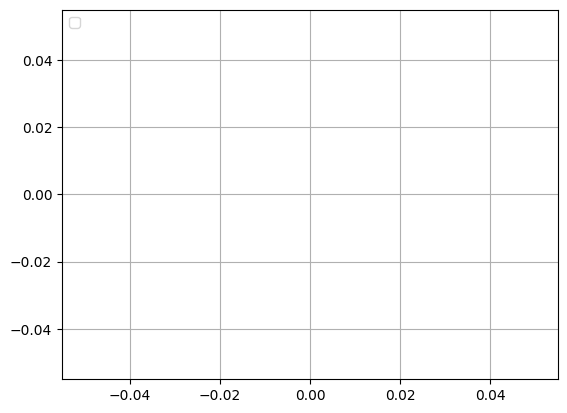

In [ ]:
# En una variable preparar la columna del df que quiero ajustar
# fdp_constitucion_hora = Fitter(productos.Product_Width_Cm)
# Filtrar a algunas distribuciones típicas (cambiá esta lista según lo que necesites)
# fdp_constitucion_hora = Fitter(productos['Product_Width_Cm'],
        #    distributions=['norm', 'expon', 'gamma', 'lognorm', 'uniform'])
fdp_constitucion_hora = Fitter(productos['Product_Width_Cm'].dropna().values)  # segundos
# fdp_constitucion_hora.fit()
# fdp_constitucion_hora.summary()


In [77]:
# Con el método fit() ajusta mis datos a las 80 distribuciones de SciPy
fdp_constitucion_hora.fit()

2025-04-30 04:03:30.649 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED anglit distribution (taking more than 60 seconds)
2025-04-30 04:03:30.649 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED alpha distribution (taking more than 60 seconds)
2025-04-30 04:03:30.651 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 60 seconds)
2025-04-30 04:03:30.657 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED arcsine distribution (taking more than 60 seconds)
2025-04-30 04:03:30.666 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED burr distribution (taking more than 60 seconds)
2025-04-30 04:03:30.667 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED beta distribution (taking more than 60 seconds)
2025-04-30 04:03:30.671 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED betaprime distribution (taking more than 60 seconds)
2025-04-30 04:03:30.672

2025-04-30 04:03:30.716 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED geninvgauss distribution (taking more than 60 seconds)
2025-04-30 04:03:30.717 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED gibrat distribution (taking more than 60 seconds)
2025-04-30 04:03:30.722 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED invgamma distribution (taking more than 60 seconds)
2025-04-30 04:03:30.735 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED invgauss distribution (taking more than 60 seconds)
2025-04-30 04:03:30.736 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED exponpow distribution (taking more than 60 seconds)
2025-04-30 04:03:30.745 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED exponweib distribution (taking more than 60 seconds)
2025-04-30 04:03:30.747 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED jf_skew_t distribution (taking more than 60 seconds)
202

/home/daniel/miniconda3/envs/simulacion/lib/python3.13/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
2025-04-30 04:03:36.425 | WARNING  | fitter.fitter:plot_pdf:419 - _fit was not fitted. no parameters available
2025-04-30 04:03:36.426 | WARNING  | fitter.fitter:plot_pdf:419 - pearson3 was not fitted. no parameters available
2025-04-30 04:03:36.427 | WARNING  | fitter.fitter:plot_pdf:419 - pareto was not fitted. no parameters available
2025-04-30 04:03:36.427 | WARNING  | fitter.fitter:plot_pdf:419 - norminvgauss was not fitted. no parameters available
2025-04-30 04:03:36.428 | WARNING  | fitter.fitter:plot_pdf:419 - ncx2 was not fitted. no parameters available
2025-04-30 04:03:36.428 | WARNING  | fitter.fitter:plot_pdf:419 - nct was not fitted. no parameters available
2025-04-30 04:03:36.429 | WARNING  | fitter.fitter:plot_pdf:419 - ncf was not fitted. no parameters available
2025-04-30 04:03:36.429 | WA

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
_fit,inf,inf,inf,inf,NaN,NaN
pearson3,inf,inf,inf,inf,NaN,NaN
pareto,inf,inf,inf,inf,NaN,NaN
norminvgauss,inf,inf,inf,inf,NaN,NaN
ncx2,inf,inf,inf,inf,NaN,NaN
nct,inf,inf,inf,inf,NaN,NaN
ncf,inf,inf,inf,inf,NaN,NaN
nakagami,inf,inf,inf,inf,NaN,NaN
multivariate_normal,inf,inf,inf,inf,NaN,NaN
moyal,inf,inf,inf,inf,NaN,NaN


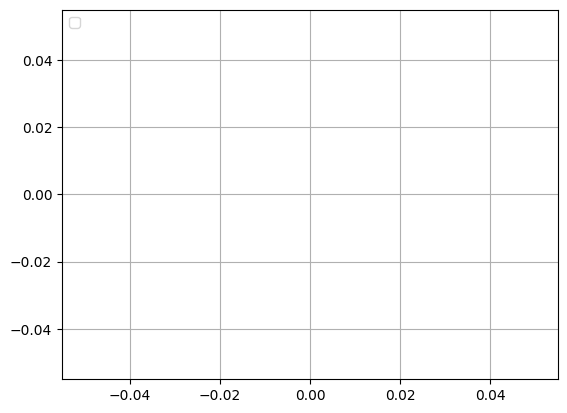

In [78]:
# Summary me muestra el resumen de los mejores ajustes
fdp_constitucion_hora.summary(10)

# 6. Simulacion

In [79]:
# get_best me devuelve la mejor distribución de acuerdo al criterio que le indico y sus parámetros
fdp_constitucion_hora.get_best(method='sumsquare_error')

KeyError: '_fit'

In [ ]:
fdp_constitucion_hora.get_best(method='ks_statistic')

{'laplace_asymmetric': {'kappa': 0.7251135824984483,
  'loc': 11.516666854568195,
  'scale': 7.233781792406836}}

In [ ]:
# Para simular, guardo los valores de los parámetros en 4 variables
dfn = 10.210149046195188
dfd = 24.449261873976212
loc = -0.210629715477468
scale =  15.900756775955681

In [ ]:
# Gracias al método rvs del módulo stats de Scipy, puedo generar datos
# con los parámetros que me dio Fitter
fdp_f = stats.f.rvs(dfn, dfd, loc=loc, scale=scale, size=35000)

In [ ]:
# Esta variable es un array de Numpy con valores similares a mis datos de origen
fdp_f

array([26.21574143, 12.58754573,  9.59205569, ...,  5.64858393,
       10.90266947, 18.84432123])

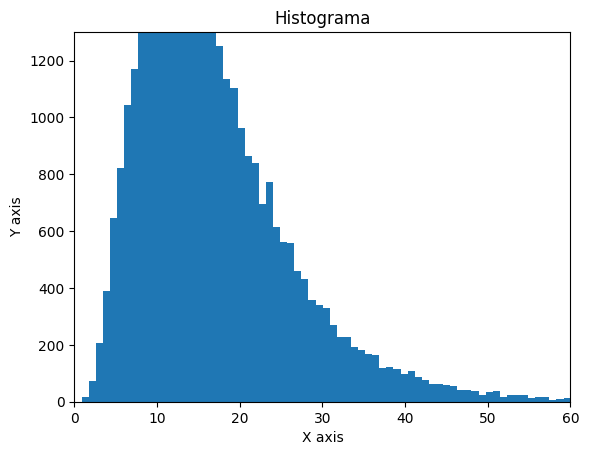

In [ ]:
# Histograma de datos de verificación
plt.title("Histograma")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.xlim(0, 60)
plt.ylim(0, 1300)
plt.hist(fdp_f, bins=150)
plt.show()